# Package

In [32]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Loading the Dataset

In [6]:
data = pd.read_csv('./data/Github Repo Dataset.csv')
df = data.copy()
X = df.describe().T

## Converting the datatype to make the computation more faster

In [110]:
df.shape

(215029, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215029 entries, 0 to 215028
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Name             215027 non-null  object
 1   Description      206997 non-null  object
 2   URL              215029 non-null  object
 3   Created At       215029 non-null  object
 4   Updated At       215029 non-null  object
 5   Homepage         78390 non-null   object
 6   Size             215029 non-null  int64 
 7   Stars            215029 non-null  int64 
 8   Forks            215029 non-null  int64 
 9   Issues           215029 non-null  int64 
 10  Watchers         215029 non-null  int64 
 11  Language         198953 non-null  object
 12  License          161990 non-null  object
 13  Topics           215029 non-null  object
 14  Has Issues       215029 non-null  bool  
 15  Has Projects     215029 non-null  bool  
 16  Has Downloads    215029 non-null  bool  
 17  Has Wiki  

In [9]:
df.dtypes.value_counts()

object    10
bool       9
int64      5
Name: count, dtype: int64

In [10]:
for f in df:
    t = df[f].dtype
    if t == 'int64':
        df[f] = df[f].astype('int32')
    elif t == 'float64':
        df[f] = df[f].astype('float32')

Y = df.describe().T


In [11]:
X == Y

,count,mean,std,min,25%,50%,75%,max
Size,True,True,True,True,True,True,True,True
Stars,True,True,True,True,True,True,True,True
Forks,True,True,True,True,True,True,True,True
Issues,True,True,True,True,True,True,True,True
Watchers,True,True,True,True,True,True,True,True


In [12]:
df.head()

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,Watchers,Language,License,Topics,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
0,freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24T17:49:19Z,2023-09-21T11:32:33Z,http://contribute.freecodecamp.org/,387451,374074,33599,248,374074,TypeScript,BSD-3-Clause,"['careers', 'certification', 'community', 'cur...",True,True,True,False,True,False,False,False,False,main
1,free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-progra...,2013-10-11T06:50:37Z,2023-09-21T11:09:25Z,https://ebookfoundation.github.io/free-program...,17087,298393,57194,46,298393,NaN,CC-BY-4.0,"['books', 'education', 'hacktoberfest', 'list'...",True,False,True,False,True,False,False,False,False,main
2,awesome,😎 Awesome lists about all kinds of interesting...,https://github.com/sindresorhus/awesome,2014-07-11T13:42:37Z,2023-09-21T11:18:22Z,NaN,1441,269997,26485,61,269997,NaN,CC0-1.0,"['awesome', 'awesome-list', 'lists', 'resource...",True,False,True,False,True,False,False,False,False,main
3,996.ICU,Repo for counting stars and contributing. Pres...,https://github.com/996icu/996.ICU,2019-03-26T07:31:14Z,2023-09-21T08:09:01Z,https://996.icu,187799,267901,21497,16712,267901,NaN,NOASSERTION,[],False,False,True,False,False,False,False,True,False,master
4,coding-interview-university,A complete computer science study plan to beco...,https://github.com/jwasham/coding-interview-un...,2016-06-06T02:34:12Z,2023-09-21T10:54:48Z,NaN,20998,265161,69434,56,265161,NaN,CC-BY-SA-4.0,"['algorithm', 'algorithms', 'coding-interview'...",True,False,True,False,False,False,False,False,False,main


## Duplicates

In [13]:
df.duplicated().sum()

0

## Missing

In [14]:
temp = df.isna().sum().sort_values(ascending=False)
temp = temp[temp.values > 0]
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=temp.index,
        y=temp.values,
        text=temp.values,

    )
)
fig.update_layout(
    template='plotly_dark',
    title=''

)
fig.show()

In [15]:
(temp.values.sum() / df.size) * 100

4.142619522638031

In [16]:
data[[t for t in temp.index]].dtypes

Homepage       object
License        object
Language       object
Description    object
Name           object
dtype: object

# Unique Values

In [17]:
temp = df.select_dtypes('object').nunique().sort_values(ascending=False)
temp

URL               215029
Created At        214922
Description       206109
Name              196820
Updated At        193011
Topics            110123
Homepage           74197
Default Branch      2326
Language             369
License               45
dtype: int64

In [18]:
px.bar(x=temp.index, y=temp.values,
title='Number of Unique Values in Each Features').update_layout(
    xaxis_title = 'Features',
    yaxis_title = 'Unique Values Count'
)

# Relations

array([[<Axes: xlabel='Size', ylabel='Size'>,
        <Axes: xlabel='Stars', ylabel='Size'>,
        <Axes: xlabel='Forks', ylabel='Size'>,
        <Axes: xlabel='Issues', ylabel='Size'>,
        <Axes: xlabel='Watchers', ylabel='Size'>],
       [<Axes: xlabel='Size', ylabel='Stars'>,
        <Axes: xlabel='Stars', ylabel='Stars'>,
        <Axes: xlabel='Forks', ylabel='Stars'>,
        <Axes: xlabel='Issues', ylabel='Stars'>,
        <Axes: xlabel='Watchers', ylabel='Stars'>],
       [<Axes: xlabel='Size', ylabel='Forks'>,
        <Axes: xlabel='Stars', ylabel='Forks'>,
        <Axes: xlabel='Forks', ylabel='Forks'>,
        <Axes: xlabel='Issues', ylabel='Forks'>,
        <Axes: xlabel='Watchers', ylabel='Forks'>],
       [<Axes: xlabel='Size', ylabel='Issues'>,
        <Axes: xlabel='Stars', ylabel='Issues'>,
        <Axes: xlabel='Forks', ylabel='Issues'>,
        <Axes: xlabel='Issues', ylabel='Issues'>,
        <Axes: xlabel='Watchers', ylabel='Issues'>],
       [<Axes: xlabel='S

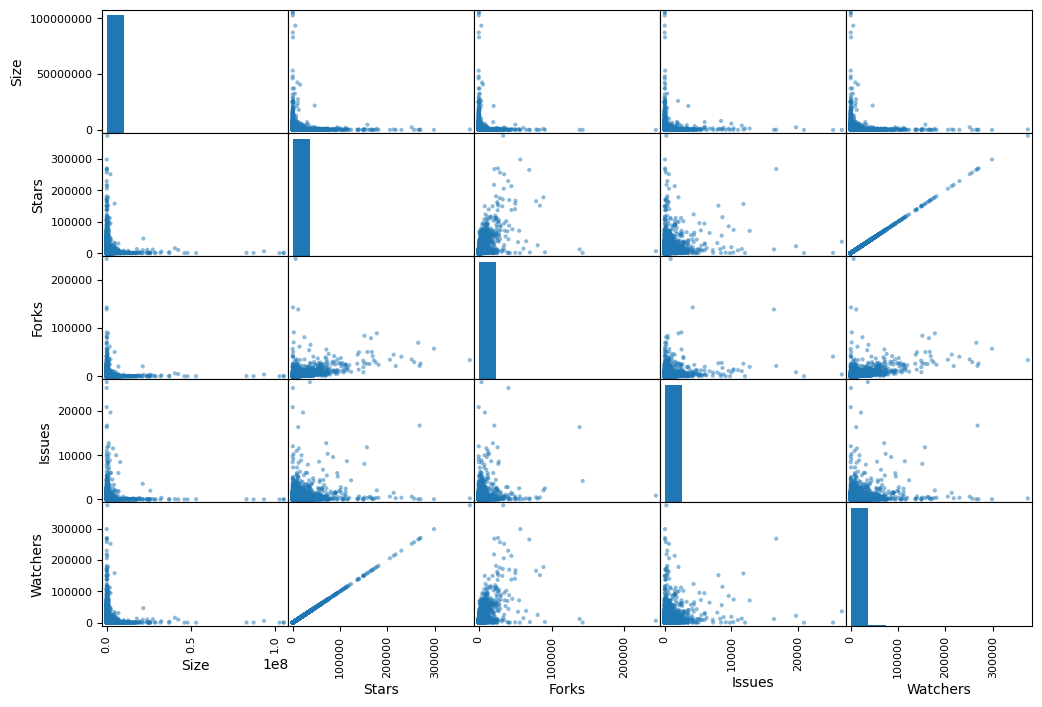

In [25]:
from pandas.plotting import scatter_matrix

scatter_matrix(df.select_dtypes('int32'), figsize=(12,8))


In [87]:
cor_mat = df.select_dtypes(['int32']).corr(method='pearson')

In [88]:
px.imshow(cor_mat,text_auto=True, aspect='auto', color_continuous_scale='purp')

In [91]:
round(cor_mat * 100,2)

,Size,Stars,Forks,Issues,Watchers
Size,100.00,2.49,2.97,4.15,2.49
Stars,2.49,100.00,58.30,28.27,100.00
Forks,2.97,58.30,100.00,28.72,58.30
Issues,4.15,28.27,28.72,100.00,28.27
Watchers,2.49,100.00,58.30,28.27,100.00


### Inference From Correlation Matrix

$\rho > 0.90$

$\rho <= 0.85$

In [93]:
cor_mat_bool = df.select_dtypes(['bool']).corr()
px.imshow(cor_mat_bool,text_auto=True, aspect='auto', color_continuous_scale='purp')

In [49]:
df[['Is Fork']].value_counts()

Is Fork
False      215029
Name: count, dtype: int64

In [96]:
round(cor_mat_bool.drop('Is Fork') * 100,2)

,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template
Has Issues,100.00,18.28,8.07,22.18,1.95,4.36,NaN,-11.14,-0.36
Has Projects,18.28,100.00,3.94,59.49,-3.67,-11.97,NaN,-4.24,-2.18
Has Downloads,8.07,3.94,100.00,11.85,-0.59,0.26,NaN,-3.15,0.53
Has Wiki,22.18,59.49,11.85,100.00,-5.55,-11.52,NaN,-7.63,-1.20
Has Pages,1.95,-3.67,-0.59,-5.55,100.00,9.79,NaN,0.61,0.53
Has Discussions,4.36,-11.97,0.26,-11.52,9.79,100.00,NaN,-6.97,2.57
Is Archived,-11.14,-4.24,-3.15,-7.63,0.61,-6.97,NaN,100.00,-0.72
Is Template,-0.36,-2.18,0.53,-1.20,0.53,2.57,NaN,-0.72,100.00


### Inference From Correlation Matrix

$\rho > 0.90$

$\rho <= 0.85$

# Plots

In [111]:
px.histogram(data_frame=df['Size'])

In [114]:
help(pd.size)

AttributeError: module 'pandas' has no attribute 'size'

# Conclusion

**Dataset Description**

Total Records: $215029$

- Features Present: $24$
  - `object` = $10$
  - `int64` = $5$
  - `bool` = $9$ 

- No duplicate values
- *Missing Values Exists*
  - Percentage Present: $4.14\%$
  - Only occur for columns of `dtype=object` i.e. `str` 